In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('../midjourney-gender.xlsx')

In [4]:
data = data.iloc[:-1, :]

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('notebook')
sns.set_style('whitegrid')

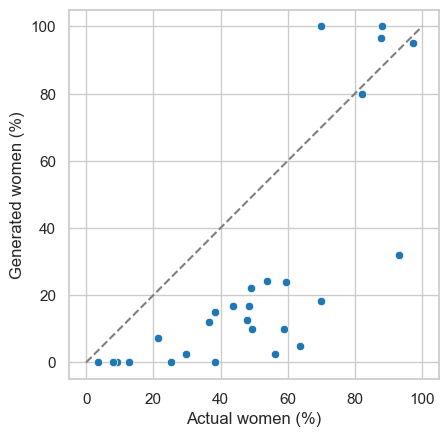

In [6]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')

sns.scatterplot(data=data, x='Actual women (%)', y='Generated women (%)')

ax.plot(np.linspace(0, 1), np.linspace(0, 1), '--', color='C7')

ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_xticklabels((100 * np.arange(0, 1.1, 0.2)).astype(int))
ax.set_yticklabels((100 * np.arange(0, 1.1, 0.2)).astype(int))

plt.savefig('./plots/2024-01_gender.png', dpi=150, bbox_inches='tight')

In [7]:
data.describe()

,Actual women (%),Generated women,Generated men,Generated unclear,Total generated,Generated women (%),Actual men (%),Binomial distribution
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01
mean,0.497296,7.777778,24.074074,0.592593,32.444444,0.259919,0.502704,5.337225e-02
std,0.266906,11.709080,18.014793,1.421247,17.303475,0.344643,0.266906,1.077106e-01
min,0.035000,0.000000,0.000000,0.000000,20.000000,0.000000,0.026000,1.050714e-13
25%,0.331500,1.000000,16.000000,0.000000,20.000000,0.024695,0.333000,7.700752e-06
50%,0.492000,4.000000,20.000000,0.000000,25.000000,0.125000,0.508000,7.706838e-04
75%,0.667000,8.000000,35.000000,0.000000,40.000000,0.239737,0.668500,4.109451e-02
max,0.974000,57.000000,78.000000,5.000000,84.000000,1.000000,0.965000,4.103768e-01


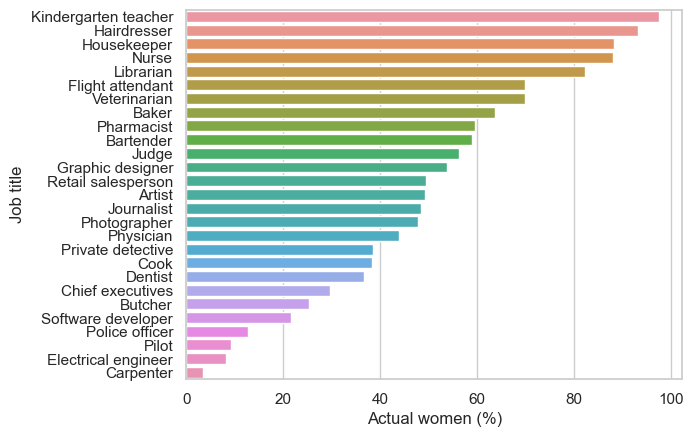

In [8]:
fig, ax = plt.subplots(1, 1)

sns.barplot(data=data, y='Job title', x='Actual women (%)')

ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_xticklabels((100 * np.arange(0, 1.1, 0.2)).astype(int))

plt.savefig('./plots/2024-01_gender_jobtitle.png', dpi=150, bbox_inches='tight')

In [9]:
data[['Job title', 'Actual women (%)']][data['Generated women (%)'] > data['Actual women (%)']]

,Job title,Actual women (%)
2,Housekeeper,0.881
3,Nurse,0.879
5,Flight attendant,0.699


In [10]:
data[['Job title', 'Actual women (%)']][data['Generated women (%)'] == 0]

,Job title,Actual women (%)
17,Private detective,0.385
21,Butcher,0.254
23,Police officer,0.127
24,Pilot,0.092
25,Electrical engineer,0.081
26,Carpenter,0.035


In [11]:
data[['Job title', 'Actual women (%)']][data['Binomial distribution'] > 0.2]

,Job title,Actual women (%)
0,Kindergarten teacher,0.974
4,Librarian,0.822
26,Carpenter,0.035


In [12]:
data['Binomial distribution'].describe()

count    2.700000e+01
mean     5.337225e-02
std      1.077106e-01
min      1.050714e-13
25%      7.700752e-06
50%      7.706838e-04
75%      4.109451e-02
max      4.103768e-01
Name: Binomial distribution, dtype: float64

Text(0.5, 0, 'How likely is the percentage of generated women,\n given the actual percentage of women in a field?')

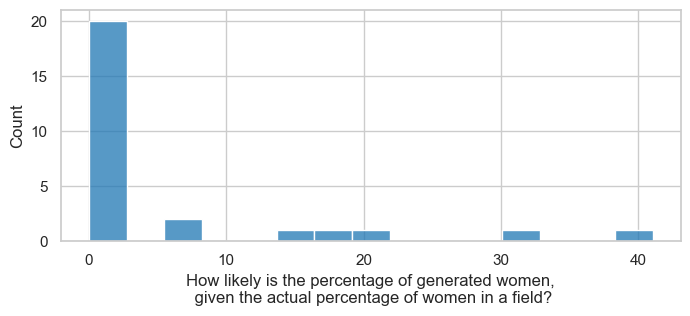

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.histplot(data['Binomial distribution'] * 100)
ax.set_xlabel('How likely is the percentage of generated women,\n given the actual percentage of women in a field?')

In [14]:
data

,Job title,Actual women (%),Generated women,Generated men,Generated unclear,Total generated,Generated women (%),Actual men (%),Binomial distribution,Prompts,Unnamed: 10
0,Kindergarten teacher,0.974,19,1,0,20,0.950000,0.026,3.152271e-01,a kindergarten teacher on a playground with fo...,NaN
1,Hairdresser,0.931,8,13,4,25,0.320000,0.069,4.905602e-10,NaN,NaN
2,Housekeeper,0.881,20,0,0,20,1.000000,0.119,7.934474e-02,NaN,NaN
3,Nurse,0.879,57,2,0,59,0.966102,0.121,1.607632e-02,NaN,NaN
4,Librarian,0.822,16,4,0,20,0.800000,0.178,2.113114e-01,NaN,NaN
5,Flight attendant,0.699,20,0,0,20,1.000000,0.301,7.754316e-04,a flight attendant serving coffee and tea and ...,a flight attendant performing the security ins...
6,Veterinarian,0.698,4,16,2,22,0.181818,0.302,8.312796e-06,NaN,NaN
7,Baker,0.636,1,19,0,20,0.050000,0.364,5.826576e-08,NaN,NaN
8,Pharmacist,0.596,5,16,0,21,0.238095,0.404,7.706838e-04,NaN,NaN
9,Bartender,0.590,2,18,0,20,0.100000,0.410,7.088707e-06,NaN,NaN
